#### Import python files from another directory
In order to reuse code written in .py files you need to import them.
If they are from a distant folder, rather than copy-paste it into the current folder, you can write:

In [1]:
import sys
sys.path.append("../../ex02/template") # This goes up twice in the directories tree (hence in labs)
                                       # then goes down to ex02/template where your files from lab 2 are.

you can now import your desired files, for example, we can import grid_search.py with:

In [2]:
import grid_search        # You then need to call your functions using grid_search.function_name()
import grid_search as gs  # You then need to call your functions using gs.function_name()
from grid_search import * # You can call any functions of the file with function_name()

# Let's try to call generate_w from grid_search.py:
w0, w1 = generate_w(5)
print(w0, w1)

[-100.  -25.   50.  125.  200.] [-150.  -75.    0.   75.  150.]


As you can see we are now able to call functions from the grid_search.py file.

In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from gradient_descent import *
from test_utils import test
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [4]:
from costs import *

In [5]:
def least_squares(y, tx):
    """Calculate the least squares solution.
       returns mse, and optimal weights.
    
    Args:
        y: numpy array of shape (N,), N is the number of samples.
        tx: numpy array of shape (N,D), D is the number of features.
    
    Returns:
        w: optimal weights, numpy array of shape(D,), D is the number of features.
        mse: scalar.

    >>> least_squares(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]))
    (array([ 0.21212121, -0.12121212]), 8.666684749742561e-33)
    """
    A = tx.T @ tx
    b = tx.T @ y
    w = np.linalg.solve(A, b)
    mse = compute_loss(y, tx, w)
    
    return w, mse

### You can test your implementation here

In [7]:
test(least_squares)
# NB:
# 
# Due to precision issues, 
# the output might not be exactly the same 
# even if you have implemented the right code.
#
# For example, the mse output expected to be
# 8.666684749742561e-33,
# but you might get some other small number
# close to zero.
#
# In this case,
# Failing the test doesn't necessarily means
# your implementation is wrong.:) 

❌ The are some issues with your implementation of `least_squares`:
**********************************************************************
File "__main__", line 13, in least_squares
Failed example:
    least_squares(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]))
Expected:
    (array([ 0.21212121, -0.12121212]), 8.666684749742561e-33)
Got:
    (array([ 0.21212121, -0.12121212]), 2.946672814912471e-32)
**********************************************************************


### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [8]:
def test_your_least_squares():
    """
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    """
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    
    # Least squares
    w_ls, mse_ls = least_squares(y, tx)
    
    print("Least squares found parameters: ", w_ls, " and loss", mse_ls)
    
    # Grid search
    intervals = 200
    grid_w0, grid_w1 = generate_w(intervals)
    losses = grid_search(y, tx, grid_w0, grid_w1)
    loss, w0_s, w1_s = get_best_parameters(grid_w0, grid_w1, losses)
    
    
    print("Grid search found parameters: ", [w0_s, w1_s], " and loss", loss)

Test it here

In [9]:
test_your_least_squares()

Least squares found parameters:  [73.293922   13.47971243]  and loss 15.385887868829398
Grid search found parameters:  [73.36683417085428, 12.8140703517588]  and loss 15.610085652488799


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [166]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [167]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree.
    
    Args:
        x: numpy array of shape (N,), N is the number of samples.
        degree: integer.
        
    Returns:
        poly: numpy array of shape (N,d+1)
        
    >>> build_poly(np.array([0.0, 1.5]), 2)
    array([[1.  , 0.  , 0.  ],
           [1.  , 1.5 , 2.25]])
    """
    return np.array([x ** d for d in range(degree+1)]).T

In [168]:
test(build_poly)

✅ Your `build_poly` passed 1 tests.


Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [169]:
from plots import *
def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        poly_x = build_poly(x, degree)
        weights, mse = least_squares(y, poly_x)
        rmse = np.sqrt(2 * mse)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()

    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737484
Processing 3th experiment, degree=7, rmse=0.2496587036090733
Processing 4th experiment, degree=12, rmse=0.24328247483727994


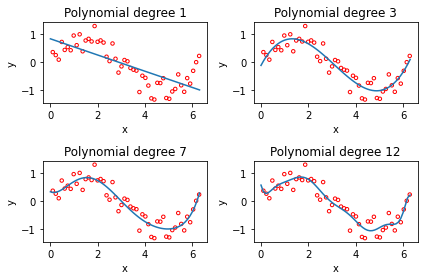

In [170]:
polynomial_regression()

Your results should look like this:

![alt text](visualize_polynomial_regression.png)

# 2 Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [171]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing. If ratio times the number of samples is not round
    you can use np.floor. Also check the documentation for np.random.permutation,
    it could be useful.
    
    Args:
        x: numpy array of shape (N,), N is the number of samples.
        y: numpy array of shape (N,).
        ratio: scalar in [0,1]
        seed: integer.
        
    Returns:
        x_tr: numpy array containing the train data.
        x_te: numpy array containing the test data.
        y_tr: numpy array containing the train labels.
        y_te: numpy array containing the test labels.
        
    >>> split_data(np.arange(13), np.arange(13), 0.8, 1)
    (array([ 2,  3,  4, 10,  1,  6,  0,  7, 12,  9]), array([ 8, 11,  5]), array([ 2,  3,  4, 10,  1,  6,  0,  7, 12,  9]), array([ 8, 11,  5]))
    """
    # set seed
    np.random.seed(seed)
    data_zip = np.random.permutation(list(zip(x, y)))
    x_p, y_p = map(np.array, list(zip(*data_zip)))
    splt = int(np.floor(ratio * len(y)))
    return (x_p[:splt], x_p[splt:], y_p[:splt], y_p[splt:])

In [172]:
test(split_data)

✅ Your `split_data` passed 1 tests.


Then, test your `split_data` function below.

In [173]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees.
    
    Returns:
      x_tr: numpy array
      x_te: numpy array
      y_tr: numpy array
      y_te: numpy array
      weights: weights from the least squares optimization"""
    
    
    # split the data into train and test data
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    
    # form train and test data with polynomial basis function
    poly_x_tr = build_poly(x_tr, degree)
    poly_x_te = build_poly(x_te, degree)
    
    # calculate weight through least square: TODO
    weights, mse_tr = least_squares(y_tr, poly_x_tr)
        
    
    # calculate RMSE for train and test data,
    rmse_tr = np.sqrt(2 * mse_tr)
    rmse_te = np.sqrt(2 * compute_loss(y_te, poly_x_te, weights))
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

    return x_tr, x_te, y_tr, y_te, weights

Demo time

proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.7, degree=3, Training RMSE=0.249, Testing RMSE=0.308
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460


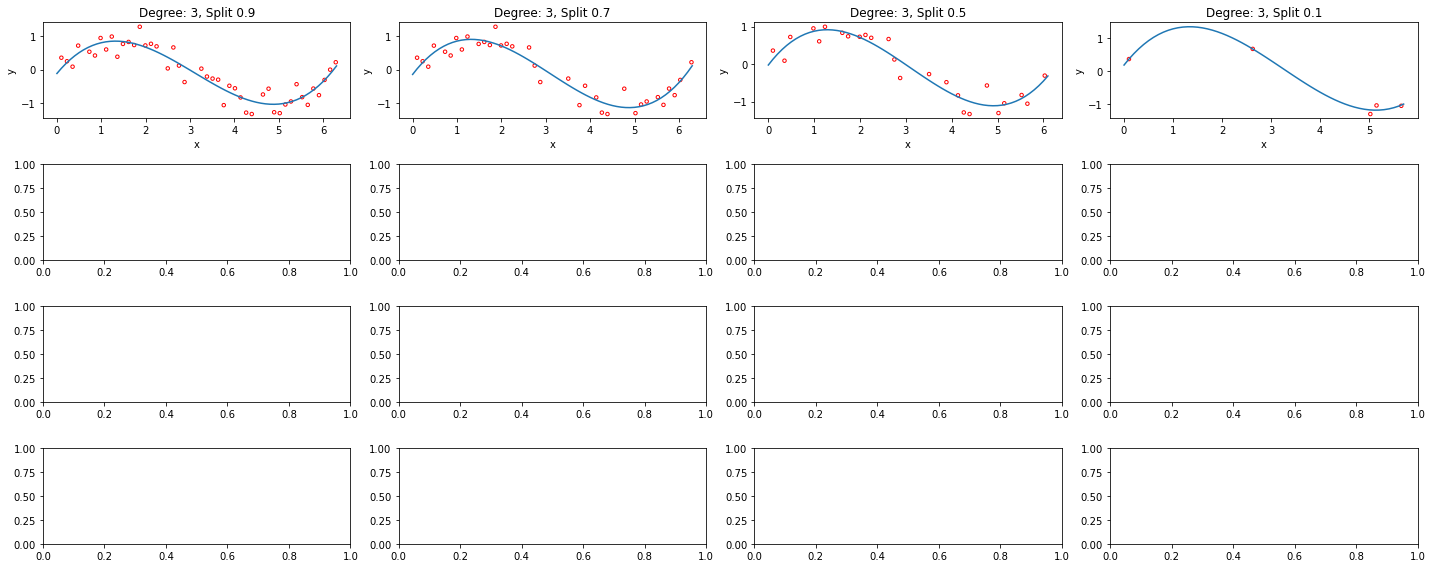

In [185]:
seed = 6
degrees = [3]#[1, 3, 7, 12]
split_ratios = [0.9, 0.7, 0.5, 0.1]

# define the structure of the figure
num_row = 4
num_col = 4
axs = plt.subplots(num_row, num_col, figsize=(20,8))[1]

for ind, split_ratio in enumerate(split_ratios):
    for ind_d, degree in enumerate(degrees):
        x_tr, x_te, y_tr, y_te, w = train_test_split_demo(x, y, degree, split_ratio, seed)
        plot_fitted_curve(
            y_tr, x_tr, w, degree, axs[ind_d][ind % num_col])
        axs[ind_d][ind].set_title(f'Degree: {degree}, Split {split_ratio}')
plt.tight_layout()


Your graph should look like this:

![alt text](split_demo.png)

+ When the proportion of training data goes down for degree 3, then the model can simply hit data points and score low RMSE during training. However, this won't match the test data.
+ During training on degree 7, the model perfectly matches the data points (thanks to the fundamental theorem of algebra).
+ The best split is therefore the one that minimizes test RMSE.
+ On high degrees and high proportion of test data, the test RMSE gets very high because raising a floating point value to a high power will result in numerical inaccuracies with respect to the linear model. 

# Ridge Regression
Please fill in the function below.

In [199]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression.
    
    Args:
        y: numpy array of shape (N,), N is the number of samples.
        tx: numpy array of shape (N,D), D is the number of features.
        lambda_: scalar.
    
    Returns:
        w: optimal weights, numpy array of shape(D,), D is the number of features.

    >>> ridge_regression(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]), 0)
    array([ 0.21212121, -0.12121212])
    >>> ridge_regression(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]), 1)
    array([0.03947092, 0.00319628])
    """
    N = tx.shape[0]
    D = tx.shape[1]
    A = tx.T @ tx + 2 * N * lambda_ * np.eye(D)
    b = tx.T @ y
    w = np.linalg.solve(A, b)
    
    return w

In [201]:
test(ridge_regression)

✅ Your `ridge_regression` passed 2 tests.


In [204]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)

    # split the data, and return train and test data
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)

    # form train and test data with polynomial basis function
    poly_x_tr = build_poly(x_tr, degree)
    poly_x_te = build_poly(x_te, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        
        # ridge regression with a given lambda
        w = ridge_regression(y_tr, poly_x_tr, lambda_)
        
        rmse_tr.append(np.sqrt(2 * compute_loss(y_tr, poly_x_tr, w)))
        rmse_te.append(np.sqrt(2 * compute_loss(y_te, poly_x_te, w)))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

Demo time

proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.337
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.336
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.335
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.334
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.229, Testing RMSE=0.329
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.230, Testing RMSE=0.319
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.232, Testing RMSE=0.302
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.237, Testing RMSE=0.283
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.246, Testing RMSE=0.276
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.264, Testing RMSE=0.298
proportion=0.5, degree=7, lambda=0.193, 

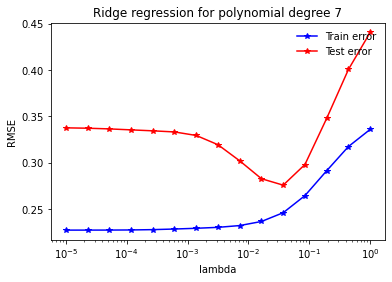

In [207]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)


Your plot should look like:

![alt text](ridge_regression.png)

## Theory Exercises
$\DeclareMathOperator{\Ima}{Im}$
1. Warm-Up
+ Show that the sum of two convex functions is convex. \
When two convex functions $f, g$ are also twice-differentiable, then $\nabla^2(f+g)$ is positive semidefinite, so their sum is also convex. \
Indeed, $\forall x \in X, x^T\nabla^2(f+g)x=x^T\nabla^2fx+x^T\nabla^2gx \geq 0$. \
Otherwise, we can use immediately use the definition of convexity. \
$\forall x,y \in X, \forall \lambda \in [0,1]:$ \
$(f+g)(\lambda x + (1-\lambda) y) $ \
$= f(\lambda x + (1-\lambda) y)+g(\lambda x + (1-\lambda) y)$ \
$\leq \lambda f(x) + (1-\lambda) f(y)+\lambda g(x) + (1-\lambda) g(y)$ \
$=\lambda (f+g)(x) + (1-\lambda) (f+g)(y)$.
+ How do you solve $Ax=b$? \
When $A$ is invertible, then a unique solution exists. Simply multiply on the left by $A^{-1}$ :\
$A^{-1}Ax=A^{-1}w \iff x=A^{-1}w$. \
When $A$ isn't full-rank, but $b\in \Ima A$, then there are infinite solutions which can be found by row reduction.
When $A$ isn't full-rank and $b \notin \Ima A$, then there are no solutions.
+ What is the computational complexity of...\
Grid search? Assuming you divide the search into $K$ intervals over $D$ weights, $\mathcal{O}(K^D)$ \
(one step of) Gradient Descent for linear regression with MSE cost? $\mathcal{O}(ND)$ \
(one step of) Stochastic Gradient Descent for linear regression with MSE cost? $\mathcal{O}(D) $
+ Compare two linear models... \
One should think of the condition number as being the rate at which the solution $x$ will change with respect to a change in $b$. It is a property of the matrix $A$. When $A$ is not invertible, the conditioning number is infinite.

In [219]:
tx_1 = np.array([[400, -201], [-800, 401]])
y = np.array([200, -200])
w, mse = least_squares(y, tx_1)
print(w)

[ -99.99999999 -199.99999998]


In [220]:
tx_2 = np.array([[401, -201], [-800, 401]])
y = np.array([200, -200])
w, mse = least_squares(y, tx_2)
print(w)

[40000.12981314 79800.25897915]


In [222]:
print(np.linalg.cond(tx_1))
print(np.linalg.cond(tx_2))

2503.0046004808573
1002003.0000501256


2. Cost functions
+ Drawing on paper.
+ Gradient. \
Let $e$ be the column vector with elements $\frac{(x_n^T w - y_n)}{y_n^2+\epsilon}$. \
$\nabla \mathcal{L}(w) = \nabla \frac{1}{N}\sum_{n=1}^N\frac{(x_n^T w - y_n)^2}{y_n^2 + \epsilon} = \frac{2}{N}X^Te.$


In [250]:
epsilon = 0.01

def l0(y, tx, w)
    N = y.shape[0]
    e = (tx @ w - y)
    return (e.T @ e) / N

def l1(y, tx, w):
    N = y.shape[0]
    e = (tx @ w - y) / np.sqrt(y**2 + epsilon)    
    return (e.T @ e) / N

def l2(y, tx, w):
    N = y.shape[0]
    e = (np.log(tx @ w + 1) - np.log(y + 1))
    return (e.T @ e) / N

y = np.array([1])
tx = np.array([[100]])
w = np.array([1])

print(l1(y, tx, w))
print(l2(y, tx, w))

9703.960396039605
15.381874850501584
